In [63]:
import numpy as np
from IPython.display import display, Image
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import pandas as pd
from hmmlearn import hmm
import numpy as np
import seaborn as sns
from scipy.stats import norm
import itertools
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from  sklearn.metrics import mean_squared_error as mse
from astropy.io import fits
import matplotlib.pyplot as plt
import os, sys
dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import clean_LC

def plot_state_matrix(cm, states,title='Transition Probabilities',cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(states))
    plt.xticks(tick_marks, states)
    plt.yticks(tick_marks, states)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.3f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
    plt.ylabel('Origin state')
    plt.xlabel('Destination state')
    plt.tight_layout()


In [10]:
folder = "/work/work_teamEXOPLANET/KOI_LC/"

time_kepler = np.load(folder+"npy/KOI_LC_time.npy") 
lc_kepler = np.load(folder+"npy/KOI_LC_init.npy" )
lc_kepler.shape 

(8054, 71427)

In [19]:
!ls '/work/work_teamEXOPLANET/KOI_LC/csv'

kepler_dataset.csv  KOI_LC_init.csv	 KOI_LC_model.csv  KOI_LC_white.csv
KOI_LC_detrend.csv  KOI_LC_init_err.csv  KOI_LC_time.csv


In [57]:
df= pd.read_csv(folder+"csv/kepler_dataset.csv")
df

,Kepler ID,KOI Name,Kepler Name,KOI Number,Kepler Disposition,NExScI Disposition,RA (J2000),RA Error,Dec (J2000),Dec Error,...,Contamination Flag,Insolation Flux,Insolation Flux err1,Insolation Flux err2,Fitted Stellar Density,Fitted Stellar Density err1,Fitted Stellar Density err2,Planetary Fit,Disposition Score,File Name
0,757450,K00889.01,Kepler-75 b,889.01,CANDIDATE,CONFIRMED,19 24 33.024,0.0,+36 34 38.57,0.0,...,0,83.21,16.69,-13.87,11.62061,0.20683,-0.40258,LS+MCMC,0.999,kplr000757450-20160128150956_dvt.fits
1,892772,K01009.01,NaN,1009.01,FALSE POSITIVE,FALSE POSITIVE,19 24 36.811,0.0,+36 40 43.83,0.0,...,0,119.70,48.69,-36.91,0.88510,0.10080,-0.39457,LS+MCMC,0.000,kplr000892772-20160128150956_dvt.fits
2,1025986,K07621.01,NaN,7621.01,FALSE POSITIVE,FALSE POSITIVE,19 24 08.086,0.0,+36 46 15.75,0.0,...,0,2.00,0.92,-0.76,33.55994,16.58298,-31.53180,LS+MCMC,0.000,kplr001025986-20160128150956_dvt.fits
3,1026032,K06252.01,NaN,6252.01,FALSE POSITIVE,FALSE POSITIVE,19 24 10.577,0.0,+36 43 45.38,0.0,...,0,98.60,52.46,-21.18,0.73874,0.00021,-0.00735,LS+MCMC,0.000,kplr001026032-20160128150956_dvt.fits
4,1026957,K00958.01,NaN,958.01,CANDIDATE,CANDIDATE,19 25 01.078,0.0,+36 44 37.00,0.0,...,0,13.18,3.00,-1.98,102.86534,5.47239,-30.25813,LS+MCMC,1.000,kplr001026957-20160128150956_dvt.fits
5,1161345,K00984.01,NaN,984.01,CANDIDATE,CANDIDATE,19 24 11.712,0.0,+36 50 23.58,0.0,...,0,186.31,56.73,-28.39,8.16471,4.69586,-1.63188,LS+MCMC,0.711,kplr001161345-20160128150956_dvt.fits
6,1293031,K04162.01,NaN,4162.01,FALSE POSITIVE,FALSE POSITIVE,19 24 05.033,0.0,+36 54 13.13,0.0,...,0,149399.93,35721.31,-106451.43,0.06737,0.00658,-0.00461,LS+MCMC,0.000,kplr001293031-20160128150956_dvt.fits
7,1293046,K07622.01,NaN,7622.01,FALSE POSITIVE,FALSE POSITIVE,19 24 06.372,0.0,+36 54 58.93,0.0,...,0,3.44,0.94,-0.97,34.69388,13.11193,-21.13275,LS+MCMC,0.000,kplr001293046-20160128150956_dvt.fits
8,1431122,K00994.01,NaN,994.01,CANDIDATE,CANDIDATE,19 24 34.198,0.0,+37 03 40.76,0.0,...,0,283.62,100.01,-78.24,0.05666,3.20152,-0.06620,LS+MCMC,0.990,kplr001431122-20160128150956_dvt.fits
9,1432214,K00998.01,NaN,998.01,FALSE POSITIVE,FALSE POSITIVE,19 25 31.846,0.0,+37 04 22.76,0.0,...,0,4.68,2.07,-1.12,17.58377,0.76473,-0.48796,LS+MCMC,0.000,kplr001432214-20160128150956_dvt.fits


In [23]:
df.shape

(8054, 153)

In [25]:
falsos_pos=df.loc[df['NExScI Disposition']=='FALSE POSITIVE']
falsos_pos

,Kepler ID,KOI Name,Kepler Name,KOI Number,Kepler Disposition,NExScI Disposition,RA (J2000),RA Error,Dec (J2000),Dec Error,...,Contamination Flag,Insolation Flux,Insolation Flux err1,Insolation Flux err2,Fitted Stellar Density,Fitted Stellar Density err1,Fitted Stellar Density err2,Planetary Fit,Disposition Score,File Name
1,892772,K01009.01,NaN,1009.01,FALSE POSITIVE,FALSE POSITIVE,19 24 36.811,0.0,+36 40 43.83,0.0,...,0,119.70,48.69,-36.91,0.88510,0.10080,-0.39457,LS+MCMC,0.000,kplr000892772-20160128150956_dvt.fits
2,1025986,K07621.01,NaN,7621.01,FALSE POSITIVE,FALSE POSITIVE,19 24 08.086,0.0,+36 46 15.75,0.0,...,0,2.00,0.92,-0.76,33.55994,16.58298,-31.53180,LS+MCMC,0.000,kplr001025986-20160128150956_dvt.fits
3,1026032,K06252.01,NaN,6252.01,FALSE POSITIVE,FALSE POSITIVE,19 24 10.577,0.0,+36 43 45.38,0.0,...,0,98.60,52.46,-21.18,0.73874,0.00021,-0.00735,LS+MCMC,0.000,kplr001026032-20160128150956_dvt.fits
6,1293031,K04162.01,NaN,4162.01,FALSE POSITIVE,FALSE POSITIVE,19 24 05.033,0.0,+36 54 13.13,0.0,...,0,149399.93,35721.31,-106451.43,0.06737,0.00658,-0.00461,LS+MCMC,0.000,kplr001293031-20160128150956_dvt.fits
7,1293046,K07622.01,NaN,7622.01,FALSE POSITIVE,FALSE POSITIVE,19 24 06.372,0.0,+36 54 58.93,0.0,...,0,3.44,0.94,-0.97,34.69388,13.11193,-21.13275,LS+MCMC,0.000,kplr001293046-20160128150956_dvt.fits
9,1432214,K00998.01,NaN,998.01,FALSE POSITIVE,FALSE POSITIVE,19 25 31.846,0.0,+37 04 22.76,0.0,...,0,4.68,2.07,-1.12,17.58377,0.76473,-0.48796,LS+MCMC,0.000,kplr001432214-20160128150956_dvt.fits
12,1433962,K00982.01,NaN,982.01,FALSE POSITIVE,FALSE POSITIVE,19 27 02.870,0.0,+37 05 55.10,0.0,...,1,290.51,87.21,-73.46,0.09265,0.00000,0.00000,LS,0.000,kplr001433962-20160128150956_dvt.fits
13,1433980,K03924.01,NaN,3924.01,FALSE POSITIVE,FALSE POSITIVE,19 27 03.919,0.0,+37 05 49.89,0.0,...,0,6128.09,4886.70,-3736.14,0.06389,0.00061,-0.00083,LS+MCMC,0.000,kplr001433980-20160128150956_dvt.fits
14,1434395,K07623.01,NaN,7623.01,FALSE POSITIVE,FALSE POSITIVE,19 27 25.555,0.0,+37 03 56.34,0.0,...,0,93172.12,12806.48,-67878.27,1.00737,0.29745,-0.56373,LS+MCMC,0.014,kplr001434395-20160128150956_dvt.fits
15,1571511,K00362.01,NaN,362.01,FALSE POSITIVE,FALSE POSITIVE,19 23 59.261,0.0,+37 11 57.19,0.0,...,0,101.92,91.75,-33.91,0.31052,0.00269,-0.00269,LS+MCMC,0.004,kplr001571511-20160128150956_dvt.fits


In [29]:
index_fp=list(falsos_pos.index)
len(index_fp)

3976

In [30]:
lc_kepler = np.load(folder+"npy/KOI_LC_init.npy" )
lc_kepler.shape 

(8054, 71427)

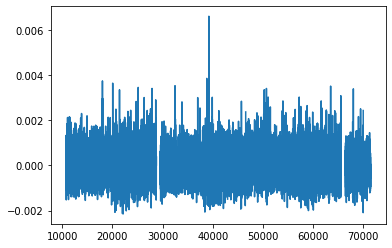

In [31]:
plt.plot(lc_kepler[index_fp[0]])

/home/mbugueno/anaconda3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Clean done (remove outliers iterativetly), erase 36 values


/home/mbugueno/Documentos/PIIC19/code/pre_process.py:120: RuntimeWarning: invalid value encountered in less
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)
/home/mbugueno/Documentos/PIIC19/code/pre_process.py:120: RuntimeWarning: invalid value encountered in greater
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)


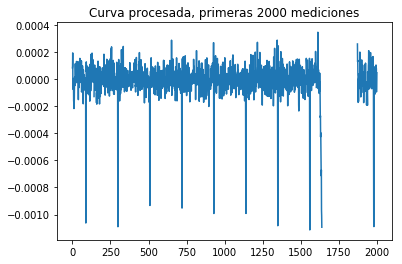

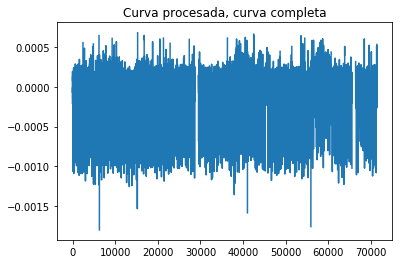

In [7]:
lc_our_detrend = clean_LC(lc_raw, plot=False)


## Sin transformación de NaNs. Por fases

In [13]:
def plot_model_and_data(plot_lc, model, p_n=2000, real_lc=[] ):
    X_state = model.predict(plot_lc) #predice el estado, no el valor 
    X_state_mean = model.means_[X_state][:,0]
    X_state_cov = np.sqrt(model.covars_[X_state][:,0,0])
    if len(real_lc) != 0:
        if len(plot_lc) != len(real_lc):
            mask_nan = np.isnan(real_lc)
            aux = np.tile(np.nan, len(real_lc) )
            
            aux_lc = aux.copy()
            aux_lc[~mask_nan] = np.squeeze(plot_lc)
            plot_lc = aux_lc
            
            aux_X_state_mean = aux.copy()
            aux_X_state_mean[~mask_nan] = X_state_mean
            X_state_mean = aux_X_state_mean
            
            aux_X_state_cov = aux.copy()
            aux_X_state_cov[~mask_nan] = X_state_cov
            X_state_cov = aux_X_state_cov
    plt.figure(figsize=(14,6))
    plt.plot(plot_lc,'r.-',label="Data")
    plt.fill_between(np.arange(len(plot_lc)),
                     X_state_mean-1.96*X_state_cov,
                     X_state_mean+1.96*X_state_cov) 
    plt.plot(X_state_mean,'g*-',label="Prediccion de la media") 
    plt.legend()
    plt.title("prediccion de markov en curva")
    plt.show()
    
    plt.figure(figsize=(14,6))
    plt.plot(plot_lc[:p_n],'r.-',label="Data")
    plt.fill_between(np.arange(p_n),
                     X_state_mean[:p_n]-1.96*X_state_cov[:p_n],
                     X_state_mean[:p_n]+1.96*X_state_cov[:p_n]) 
    plt.plot(X_state_mean[:p_n],'g*-',label="Prediccion de la media") 
    plt.legend()
    plt.title("prediccion de markov zoom en curva")
    plt.show()

Cantidad de tramos:  823
Largo promedio entre tramos:  78.2284325638
Largo mediana entre tramos:  76.0
Largo min entre tramos:  1
Largo max entre tramos:  149


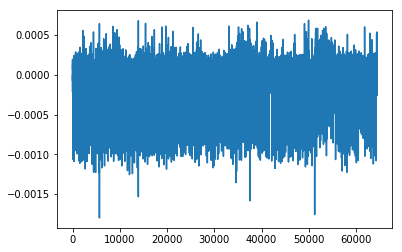

(64382, 1)


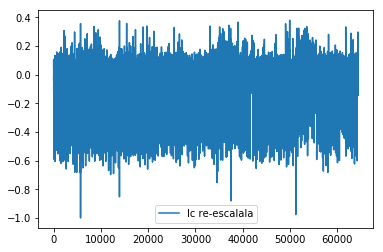

In [18]:
lc_wind_nan = []
lengths = []

sublist = []
for value in lc_our_detrend:
    if np.isnan(value) and len(sublist) != 0:
        if len(sublist) == 1: #algo?
            pass
        lc_wind_nan.append(np.asarray(sublist))
        lengths.append(len(sublist))
        sublist = []
    elif np.isnan(value) and len(sublist) == 0:
        continue
    else: #if value not nan
        sublist.append(value) 
lc_wind_nan = np.asarray(lc_wind_nan)   
lengths = np.asarray(lengths)   

print("Cantidad de tramos: ",len(lengths))
print("Largo promedio entre tramos: ", np.mean(lengths))
print("Largo mediana entre tramos: ", np.median(lengths))
print("Largo min entre tramos: ", np.min(lengths))
print("Largo max entre tramos: ", np.max(lengths))

lc_wind_nan = np.concatenate(lc_wind_nan).reshape(-1,1)
#Al parecer esto es Necesario para amplificar/disminuir escala
lc_wind_nan = lc_wind_nan/np.abs(np.min(lc_wind_nan)) 


## Kepler dataset

In [32]:
df_meta=pd.read_csv('../../KOI_Data/kepler_dataset.csv')
df_meta.head()

,Kepler ID,KOI Name,Kepler Name,KOI Number,Kepler Disposition,NExScI Disposition,RA (J2000),RA Error,Dec (J2000),Dec Error,...,Contamination Flag,Insolation Flux,Insolation Flux err1,Insolation Flux err2,Fitted Stellar Density,Fitted Stellar Density err1,Fitted Stellar Density err2,Planetary Fit,Disposition Score,File Name
0,757450,K00889.01,Kepler-75 b,889.01,CANDIDATE,CONFIRMED,19 24 33.024,0.0,+36 34 38.57,0.0,...,0,83.21,16.69,-13.87,11.62061,0.20683,-0.40258,LS+MCMC,0.999,kplr000757450-20160128150956_dvt.fits
1,892772,K01009.01,NaN,1009.01,FALSE POSITIVE,FALSE POSITIVE,19 24 36.811,0.0,+36 40 43.83,0.0,...,0,119.70,48.69,-36.91,0.88510,0.10080,-0.39457,LS+MCMC,0.000,kplr000892772-20160128150956_dvt.fits
2,1025986,K07621.01,NaN,7621.01,FALSE POSITIVE,FALSE POSITIVE,19 24 08.086,0.0,+36 46 15.75,0.0,...,0,2.00,0.92,-0.76,33.55994,16.58298,-31.53180,LS+MCMC,0.000,kplr001025986-20160128150956_dvt.fits
3,1026032,K06252.01,NaN,6252.01,FALSE POSITIVE,FALSE POSITIVE,19 24 10.577,0.0,+36 43 45.38,0.0,...,0,98.60,52.46,-21.18,0.73874,0.00021,-0.00735,LS+MCMC,0.000,kplr001026032-20160128150956_dvt.fits
4,1026957,K00958.01,NaN,958.01,CANDIDATE,CANDIDATE,19 25 01.078,0.0,+36 44 37.00,0.0,...,0,13.18,3.00,-1.98,102.86534,5.47239,-30.25813,LS+MCMC,1.000,kplr001026957-20160128150956_dvt.fits


In [42]:
kplr_ids=np.asarray(df['Kepler ID'].values)[[index_fp]]
kplr_ids.shape

/users/mbugueno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


(3976,)

In [43]:
kplr_fp=lc_kepler[[index_fp]]
kplr_fp.shape

/users/mbugueno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


(3976, 71427)

### Falsos positivos

In [48]:
!ls /work/work_teamEXOPLANET/KOI_LC/cleaned

LC_kepler_processed.npy  LC_kepler_processed_old.npy


In [60]:
our_detrends=np.load('/work/work_teamEXOPLANET/KOI_LC/cleaned/LC_kepler_processed.npy')
our_detrends=our_detrends[index_fp]
our_detrends.shape

(3976, 71427)

In [ ]:
i=0
for lc_our_detrend in our_detrends:   
    print ("recuperando curva",i+1)
    lc_wind_nan = []
    lengths = []
    sublist = []
    for value in lc_our_detrend:
        if np.isnan(value) and len(sublist) != 0:
            lc_wind_nan.append(np.asarray(sublist))
            lengths.append(len(sublist))
            sublist = []
        elif np.isnan(value) and len(sublist) == 0:
            continue
        else: 
            sublist.append(value) 
    if len(sublist) != 0:      ####IMOPRTANTEEEEEEEEEEEEEEEEEEEEEEEEEE
        lc_wind_nan.append(np.asarray(sublist))
        lengths.append(len(sublist))
    lc_wind_nan = np.asarray(lc_wind_nan)   
    lengths = np.asarray(lengths)   

    """print("Cantidad de tramos: ",len(lengths))
    print("Largo promedio entre tramos: ", np.mean(lengths))
    print("Largo mediana entre tramos: ", np.median(lengths))
    print("Largo min entre tramos: ", np.min(lengths))
    print("Largo max entre tramos: ", np.max(lengths))"""

    lc_wind_nan = np.concatenate(lc_wind_nan).reshape(-1,1)
    lc_wind_nan = lc_wind_nan/np.abs(np.min(lc_wind_nan)) 
    n_sta=15
    markov_model = hmm.GaussianHMM(n_components=n_sta, n_iter=50)
    markov_model.fit(lc_wind_nan , lengths)
    id_kepler=kplr_ids[i]    
    #plot_model_and_data(lc_wind_nan, markov_model, p_n=2000, real_lc= lc_our_detrend) 
    #plot_state_matrix(markov_model.transmat_,np.arange(n_sta))
    np.save('/work/work_teamEXOPLANET/MTF/falsos_positivos/'+str(id_kepler)+'.npy', markov_model.transmat_)
    i+=1
    plt.show()

recuperando curva 1
recuperando curva 2
recuperando curva 3
recuperando curva 4
recuperando curva 5
recuperando curva 6
recuperando curva 7
recuperando curva 8
recuperando curva 9
recuperando curva 10
recuperando curva 11
recuperando curva 12
recuperando curva 13
recuperando curva 14
recuperando curva 15
recuperando curva 16
recuperando curva 17
recuperando curva 18
recuperando curva 19
recuperando curva 20
recuperando curva 21
recuperando curva 22
recuperando curva 23
recuperando curva 24
recuperando curva 25
recuperando curva 26
recuperando curva 27
recuperando curva 28
recuperando curva 29
recuperando curva 30
recuperando curva 31
recuperando curva 32
recuperando curva 33
recuperando curva 34
recuperando curva 35
recuperando curva 36
recuperando curva 37
recuperando curva 38
recuperando curva 39
recuperando curva 40
recuperando curva 41
recuperando curva 42
recuperando curva 43
recuperando curva 44
recuperando curva 45
recuperando curva 46
recuperando curva 47
recuperando curva 48
r

In [ ]:
!ls '/work'